##### Simple Demographic Filtering : Filter -> Scoring -> Sort

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("data/demographic.csv")
df.head()

,title,genres,runtime,vote_average,vote_count,release_year,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Toy Story,Animation; Comedy; Family,81.0,7.7,5415.0,1995,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji,Adventure; Fantasy; Family,104.0,6.9,2413.0,1995,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men,Romance; Comedy,101.0,6.5,92.0,1995,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,Waiting to Exhale,Comedy; Drama; Romance,127.0,6.1,34.0,1995,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,Father of the Bride Part II,Comedy,106.0,5.7,173.0,1995,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(45130, 26)

## Step 1 : Filtering

In [13]:
df['release_year'].value_counts().sort_values(ascending=False)

2014    1956
2015    1885
2013    1873
2012    1714
2011    1663
        ... 
1878       1
1893       1
1883       1
1887       1
1874       1
Name: release_year, Length: 135, dtype: int64

In [14]:
df['genres'].value_counts()

Drama                                  4967
Comedy                                 3559
Documentary                            2704
Drama; Romance                         1299
Comedy; Drama                          1132
                                       ... 
Action; Western; Drama                    1
Adventure; Music; Mystery; Thriller       1
Music; Comedy; Romance; Fantasy           1
Drama; History; War; Western              1
Fantasy; Action; Adventure; Family        1
Name: genres, Length: 4058, dtype: int64

In [16]:
genre = ['Comedy', 'Drama'] # genre yang ingin di munculkan
duration = (60, 150) # durasi yang ingin di munculkan mulai dari 1 jam hingga 2,5 jam
year = (2000, 2019) # tahun yang ingin dimunculkan mulai dari tahun 2000 hingga 2019
topk = 20 # total data yang ingin dimunculkan pada system recommendation

In [21]:
df = df[df.release_year.between(year[0], year[1]) & # berarti release_year antara index 0 dari year dengan index 1 dari year
    df.runtime.between(duration[0], duration[1]) & # berarti runtime antara index 0 dari duration dengan index 1 dari duration
    df[genre].all(axis=1) # berarti harus semuanya bernilai true. jika mau salah satu yang true maka any() 
] 

In [22]:
df.head()

,title,genres,runtime,vote_average,vote_count,release_year,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
3064,My Dog Skip,Comedy; Drama; Family,95.0,6.5,71.0,2000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3099,Down to You,Comedy; Drama; Family; Romance,91.0,4.9,71.0,2000,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3113,Isn't She Great,Drama; Comedy,95.0,4.6,14.0,2000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3173,Hanging Up,Comedy; Drama,94.0,5.0,42.0,2000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3191,Wonder Boys,Comedy; Drama,111.0,6.9,165.0,2000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Step 2 : Scoring

<p>dikasus ini kita scoring hanya dengan menggunakan vote_average karena data film. sedangkan jika e-commerce biasanya akan menggunakan bintang</p>

## Step 3 : Sort

In [27]:
recommendation = df.loc[:, "title":"release_year"] # berarti semua yang ditampilkan mulai dari title hingga release_year
recommendation = recommendation.sort_values("vote_average", ascending=False).head(topk) 
# ascending=False berarti memulai data dari yg besar
recommendation

,title,genres,runtime,vote_average,vote_count,release_year
27729,Kolka Cool,Drama; Comedy,97.0,10.0,2.0,2011
42204,American Sharia,Drama; Comedy,96.0,10.0,1.0,2015
37469,Love at 16,Drama; Comedy,102.0,10.0,1.0,2004
41343,My Future Love,Comedy; Drama,99.0,10.0,1.0,2016
37383,God is on Air,Comedy; Drama,91.0,10.0,1.0,2002
41453,Nobody Walks in L.A.,Romance; Comedy; Drama,93.0,9.5,2.0,2015
25671,Rocks in my Pockets,Comedy; Animation; Drama,88.0,9.4,5.0,2014
45000,Bye Bye Germany,Comedy; Drama; War,102.0,8.7,3.0,2017
32222,Ghadi,Comedy; Drama; Family,100.0,8.7,3.0,2013
17124,Daayen Ya Baayen,Family; Comedy; Drama,115.0,8.5,1.0,2010


## Improve dengan IMDB Weighted Rating (IMDB company)
<p>Film dengan 100 orang yang rate 9.5 seakan-akan lebih baik daripada 10000 orang yang rate 9.0</p>
<p>Seharusnya dibobot dengan jumlah orang yang vote juga.</p>

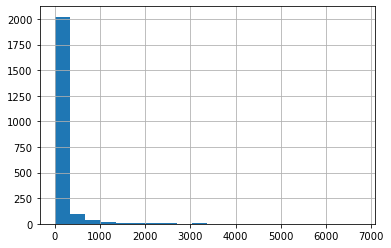

In [52]:
df['vote_count'].hist(bins=20)

In [53]:
def imdb_score(df, q=0.94):
    df = df.copy()
    
    m = df['vote_count'].quantile(q) # syarat minimum vote
    C = (df['vote_average'] * df['vote_count']).sum() / df['vote_count'].sum() # rata-rata dari semua film
    
    df = df[df['vote_count'] >= m] # filter berdasarkan minimum vote
    df['score'] = df.apply(lambda x: (x.vote_average * x.vote_count + C*m) / (x.vote_count + m), axis=1)
    return df

In [54]:
df = imdb_score(df)

In [55]:
recommendation = df.loc[:, "title":"release_year"] # berarti semua yang ditampilkan mulai dari title hingga release_year
recommendation = recommendation.sort_values("vote_average", ascending=False).head(topk) 
# ascending=False berarti memulai data dari yg besar
recommendation

,title,genres,runtime,vote_average,vote_count,release_year
18433,The Intouchables,Drama; Comedy,112.0,8.2,5410.0,2011
22777,The Grand Budapest Hotel,Comedy; Drama,99.0,8.0,4644.0,2014
38586,Captain Fantastic,Adventure; Comedy; Drama; Romance,119.0,7.9,1569.0,2016
30208,Inside Out,Drama; Comedy; Animation; Family,94.0,7.9,6737.0,2015
40643,La La Land,Comedy; Drama; Music; Romance,128.0,7.9,4745.0,2016
37978,Perfect Strangers,Comedy; Drama,97.0,7.8,803.0,2016
21406,About Time,Comedy; Drama; Science Fiction,123.0,7.8,2140.0,2013
14294,Mary and Max,Animation; Comedy; Drama,92.0,7.8,596.0,2009
24829,Wild Tales,Drama; Thriller; Comedy,125.0,7.7,878.0,2014
27781,Me and Earl and the Dying Girl,Comedy; Drama,105.0,7.7,962.0,2015


### ML Engineering : Membungkus semua code diatas menjadi sebuat class

In [60]:
class RecomenderSystem:
    def __init__(self, data):
        self.df = pd.read_csv(data) # di kasus kali ini data kita berupa file csv. menyesuaikan data di company anda
    
    def recommend(self, genre=None, duration=None, year=None, topk=10):
        df = self.df.copy()
        df = self.demographic_filter(df, genre=genre, duration=duration, year=year)
        df = self.compute_imdb_score(df)
        
        result = df.loc[:, "title":"release_year"] 
        result = result.sort_values("vote_average", ascending=False)
        result = result.head(topk) 
        return result
    
    @staticmethod # berarti untuk menandakan fungsi dibawah tidak membutuhkan parameter self
    def demographic_filter(df, genre=None, duration=None, year=None, topk=10):
        df = df.copy()
        
        if genre is not None :
            df = df[df[genre].all(axis=1)]
        if duration is not None :
            df = df[df.runtime.between(duration[0], duration[1])]    
        if year is not None : 
            df = df[df.release_year.between(year[0], year[1])]
        return df
        
        
    @staticmethod # berarti untuk menandakan fungsi dibawah tidak membutuhkan parameter self
    def compute_imdb_score(df, q=0.94):
        df = df.copy()
    
        m = df['vote_count'].quantile(q) # syarat minimum vote
        C = (df['vote_average'] * df['vote_count']).sum() / df['vote_count'].sum()

        df = df[df['vote_count'] >= m]
        df['score'] = df.apply(lambda x: (x.vote_average * x.vote_count + C*m) / (x.vote_count + m), axis=1)
        return df

In [61]:
recsys = RecomenderSystem(data='data/demographic.csv')

In [62]:
recsys.recommend(genre=['Drama', 'Comedy'], duration=(60, 150), year=(2015, 2020))

,title,genres,runtime,vote_average,vote_count,release_year
40643,La La Land,Comedy; Drama; Music; Romance,128.0,7.9,4745.0,2016
38586,Captain Fantastic,Adventure; Comedy; Drama; Romance,119.0,7.9,1569.0,2016
30208,Inside Out,Drama; Comedy; Animation; Family,94.0,7.9,6737.0,2015
37978,Perfect Strangers,Comedy; Drama,97.0,7.8,803.0,2016
27781,Me and Earl and the Dying Girl,Comedy; Drama,105.0,7.7,962.0,2015
42609,Two Is a Family,Drama; Comedy,118.0,7.6,765.0,2016
34951,The Big Short,Comedy; Drama,130.0,7.3,2679.0,2015
39548,The Edge of Seventeen,Comedy; Drama,104.0,7.3,952.0,2016
27779,Dope,Crime; Drama; Comedy,103.0,7.2,698.0,2015
35843,Eddie the Eagle,Comedy; Drama; History,106.0,7.2,682.0,2016
